<a href="https://colab.research.google.com/github/hport15/salary-prediction/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
path = '/content/drive/MyDrive/Data Science/Data/salary.csv'
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
# will rename file once dataset is finalized

""" 
1. Kaggle (also in uci repository)
2. 1994 census data for determining someone's salary
3. salary -- over or under 50k
4. classification
5. 14
6. 32561
7. There are a lot of different classes within several of the columns so I'm concerned the model will take a long time to run and
be prone to overfitting.

"""

" \n1. Kaggle (also in uci repository)\n2. 1994 census data for determining someone's salary\n3. salary -- over or under 50k\n4. classification\n5. 14\n6. 32561\n7. There are a lot of different classes within several of the columns so I'm concerned the model will take a long time to run and\nbe prone to overfitting.\n\n"

# Part 2 - Data Cleaning

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [92]:
# checking for missing data
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [93]:
# checking for duplicates
df.duplicated().sum()

24

In [94]:
# removing duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [95]:
df['capital-gain'].value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [96]:
df['capital-loss'].value_counts()

0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

In [97]:
# drop unnecessary columns
"""
Going to drop fnlwgt (the number of people the census believes the entry 
represents), education since education-num basically has the same info, capital-
gain, and capital-loss bc majority of those columns are 0.
"""

df = df.drop(['fnlwgt', 'education', 'capital-gain', 'capital-loss'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education-num   32537 non-null  int64 
 3   marital-status  32537 non-null  object
 4   occupation      32537 non-null  object
 5   relationship    32537 non-null  object
 6   race            32537 non-null  object
 7   sex             32537 non-null  object
 8   hours-per-week  32537 non-null  int64 
 9   native-country  32537 non-null  object
 10  salary          32537 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.0+ MB


In [98]:
# check for inconsistencies in categorical data
columns = list(df.columns)
catCols = []
for col in columns:
  if df[col].dtype == 'object':
    catCols.append(col)
    print(df[col].value_counts())
# didn't find any

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64
 Husband           13187
 Not-in

In [99]:
df['salary'].value_counts(normalize=True)

 <=50K    0.759074
 >50K     0.240926
Name: salary, dtype: float64

Target is not very balanced

Univariate Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


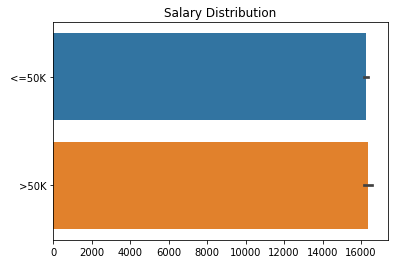

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# target
sns.barplot(df['salary'].index, df['salary'].values)
plt.title('Salary Distribution');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


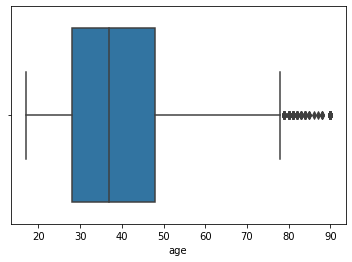

In [ ]:
# age
sns.boxplot(df['age']);

Outliers beyond the max value.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


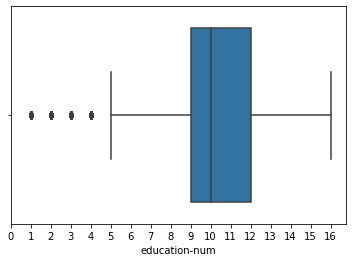

In [ ]:
# education num
sns.boxplot(df['education-num'])
plt.xticks(range(0,17));

Outliers less than the min value.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


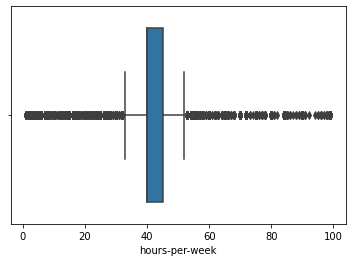

In [ ]:
# hours-per-week
sns.boxplot(df['hours-per-week']);

Outliers less than the min and greater than the max.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


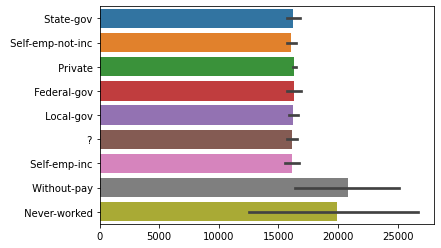

In [ ]:
# workclass
sns.barplot(df['workclass'].index, df['workclass'].values);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


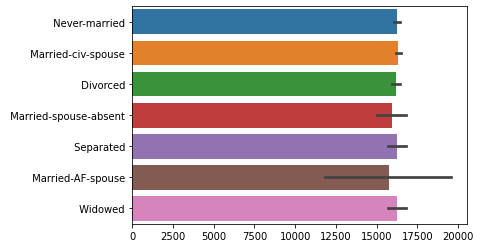

In [ ]:
# marital status
sns.barplot(df['marital-status'].index, df['marital-status'].values);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


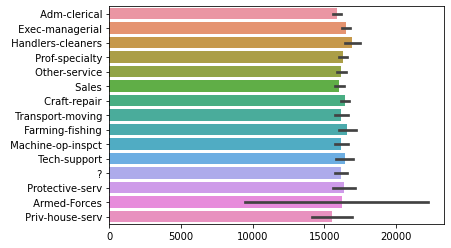

In [ ]:
# occupation
sns.barplot(df['occupation'].index, df['occupation'].values);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


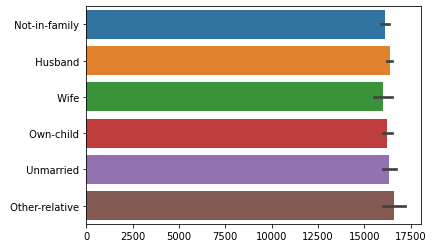

In [ ]:
# relationship
sns.barplot(df['relationship'].index, df['relationship'].values);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


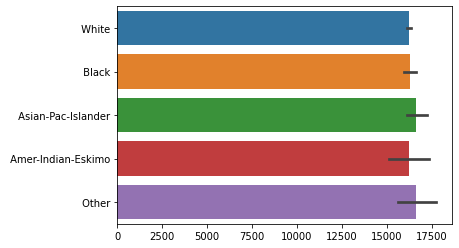

In [ ]:
# race
sns.barplot(df['race'].index, df['race'].values);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


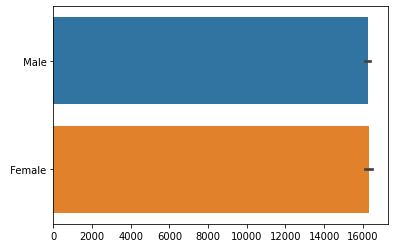

In [ ]:
# sex
sns.barplot(df['sex'].index, df['sex'].values);

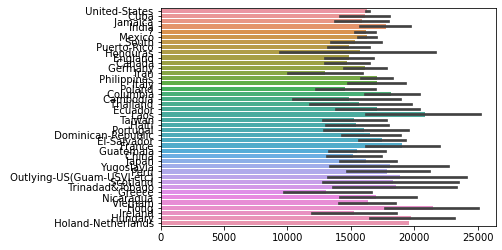

In [ ]:
# native country
sns.barplot(x=df['native-country'].index, y=df['native-country'].values);

In [ ]:
df.describe()

,age,education-num,hours-per-week
count,32537.000000,32537.000000,32537.000000
mean,38.585549,10.081815,40.440329
std,13.637984,2.571633,12.346889
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


# Part 3

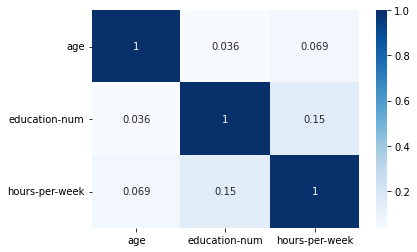

In [ ]:
# correlations
corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot=True);

None of the features/target have moderate or strong correlations.

In [ ]:
import seaborn as sns

In [ ]:
# df['salary'] = df['salary'].replace({'<=50K': 0, '>50K': 1}, regex=True)

In [ ]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


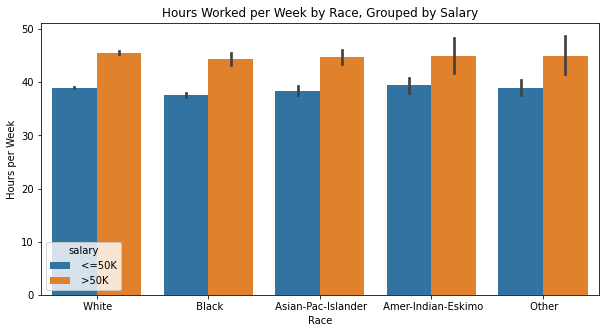

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Hours Worked per Week by Race, Grouped by Salary')
sns.barplot(x=df['race'], y=df['hours-per-week'], hue=df['salary'])
plt.xlabel('Race')
plt.ylabel('Hours per Week');

Regardless of race and salary class, people tend to work similar hours (<=50K work about 38-39 hours across all races, >50K work about 44-45 hours)

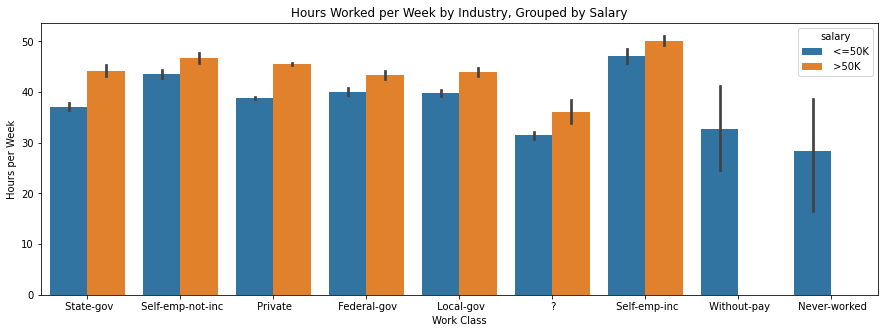

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Hours Worked per Week by Industry, Grouped by Salary')
sns.barplot(x=df['workclass'], y=df['hours-per-week'], hue=df['salary'])
plt.xlabel('Work Class')
plt.ylabel('Hours per Week');

Disregarding the last 2 work categories (since they don't constitute pay), the more hours worked, the greater salary.

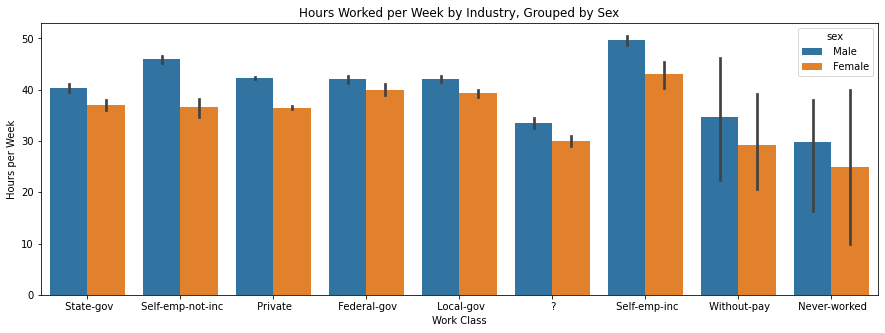

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Hours Worked per Week by Industry, Grouped by Sex')
sns.barplot(x=df['workclass'], y=df['hours-per-week'], hue=df['sex'])
plt.xlabel('Work Class')
plt.ylabel('Hours per Week');

Across all categories, men work more hours than women. The previous graph showed that more hours worked lead to more pay. Based on that observation, men are expected to make more than women. 

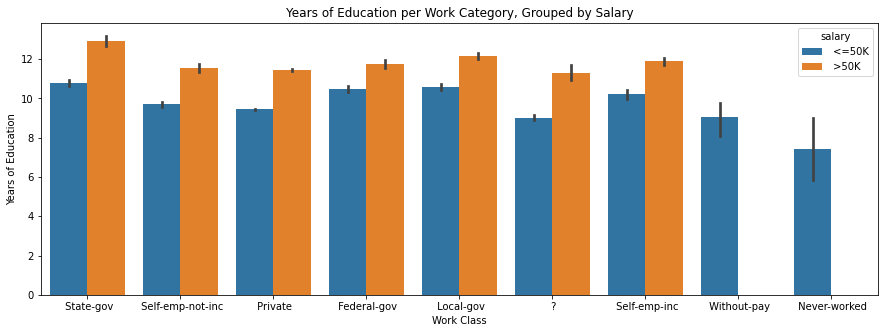

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Years of Education per Work Category, Grouped by Salary')
sns.barplot(x=df['workclass'], y=df['education-num'], hue=df['salary'])
plt.xlabel('Work Class')
plt.ylabel("Years of Education");

Disregarding the last 2 categories, the more educated you are, the higher your salary.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


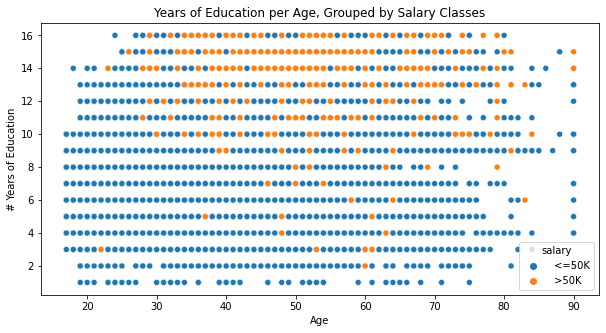

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Years of Education per Age, Grouped by Salary Classes')
plt.xlabel('Age')
plt.ylabel('# Years of Education')
sns.scatterplot(df['age'], df['education-num'], hue=df['salary']);

Between ages 32-61, people with at least 13 years of education are likely to have greater than 50K salaries.

# Part 4

In [100]:
# need to scale and ohe data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [101]:
# split X/y
X = df.drop('salary', axis=1)
y = df['salary']

In [102]:
# col selectors
numSelector = make_column_selector(dtype_include='number')
catSelector = make_column_selector(dtype_include='object')

# col transformer
transformer = ColumnTransformer(transformers=[('scaler',StandardScaler(), 
                                  numSelector),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  catSelector)], 
                                remainder='drop')

In [103]:
# Using SMOTE to balance out target (adapted from https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_trans = transformer.fit_transform(X)
X_sm, y_sm = sm.fit_resample(X_trans, y)

In [104]:
print(f'''Shape of X before SMOTE: {X_sm.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (49396, 89)
Shape of X after SMOTE: (49396, 89)

Balance of positive and negative classes (%):


 <=50K    50.0
 >50K     50.0
Name: salary, dtype: float64

target is now balanced.

In [105]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42)

In [107]:
# knn 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8351283504737226


In [108]:
# knn parameters
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [110]:
# hypertuning knn 1
param_grid = {'n_neighbors': [2,5,10,15]}

# instantiate gridsearch
knnGridSearch = GridSearchCV(knn, param_grid)

# fit data
knnGridSearch.fit(X_train, y_train)

# best parameters
knnGridSearch.best_params_

{'n_neighbors': 5}

In [111]:
# hypertuning knn 2
param_grid = {'n_neighbors': [15,20,25,30]}

# instantiate gridsearch
knnGridSearch = GridSearchCV(knn, param_grid)

# fit data
knnGridSearch.fit(X_train, y_train)

# best parameters
knnGridSearch.best_params_

{'n_neighbors': 15}

In [112]:
# hypertuning knn 3
param_grid = {'n_neighbors': [30,40,50]}

# instantiate gridsearch
knnGridSearch = GridSearchCV(knn, param_grid)

# fit data
knnGridSearch.fit(X_train, y_train)

# best parameters
knnGridSearch.best_params_

{'n_neighbors': 30}

In [113]:
# metrics for n_neighbors=15
from sklearn.neighbors import KNeighborsClassifier
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train, y_train)
print(knn15.score(X_test, y_test))
# accuracy decreased from 83.51 to 82.51

0.8250870515831241


In [114]:
# metrics for n_neighbors=30
from sklearn.neighbors import KNeighborsClassifier
knn30 = KNeighborsClassifier(n_neighbors=30)
knn30.fit(X_train, y_train)
print(knn30.score(X_test, y_test))
# accuracy decreased from 83.51 to 81.76

0.817637055632035


In [116]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.8110778200664022


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{0.0001: 0.5005263584095878,
 0.001: 0.791562069803223,
 0.01: 0.803870758765892,
 0.1: 0.8097821685966475,
 1: 0.8110778200664022,
 10: 0.8109968418495425,
 100: 0.8108348854158232,
 1000: 0.8108348854158232}

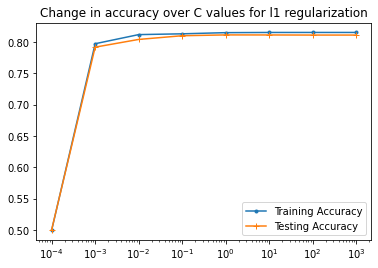

In [117]:
# create a list of c values and empty lists for scores
import matplotlib.pyplot as plt
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  logreg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logreg.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(logreg.score(X_train, y_train))
  test_scores.append(logreg.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy', marker='.')
ax.plot(c_values, test_scores, label='Testing Accuracy', marker='+')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

best model at c=1 (accuracy 81.11%)

In [127]:
# final knn
knnFinal = KNeighborsClassifier(n_neighbors=5)
knnFinal.fit(X_train, y_train)
print(knnFinal.score(X_test, y_test))

0.8351283504737226


In [122]:
# final logreg
lrFinal = LogisticRegression(C=1, max_iter=1000, 
                            solver='liblinear', 
                            penalty='l1')
lrFinal.fit(X_train, y_train)
print(lrFinal.score(X_test, y_test))

0.8111587982832618


In [120]:
# classification report for knn
from sklearn.metrics import classification_report

# knn predictions
knnTrainPred = knn.predict(X_train)
knnTestPred = knn.predict(X_test)

# print metrics
print(classification_report(y_train, knnTrainPred))
print(classification_report(y_test, knnTestPred))

              precision    recall  f1-score   support

       <=50K       0.93      0.83      0.88     18517
        >50K       0.85      0.94      0.89     18530

    accuracy                           0.89     37047
   macro avg       0.89      0.89      0.88     37047
weighted avg       0.89      0.89      0.88     37047

              precision    recall  f1-score   support

       <=50K       0.89      0.77      0.82      6181
        >50K       0.80      0.90      0.85      6168

    accuracy                           0.84     12349
   macro avg       0.84      0.84      0.83     12349
weighted avg       0.84      0.84      0.83     12349



In [123]:
# classification report for logreg
# logreg predictions
lrTrainPred = lrFinal.predict(X_train)
lrTestPred = lrFinal.predict(X_test)

# print metrics
print(classification_report(y_train, lrTrainPred))
print(classification_report(y_test, lrTestPred))

              precision    recall  f1-score   support

       <=50K       0.84      0.78      0.81     18517
        >50K       0.79      0.85      0.82     18530

    accuracy                           0.81     37047
   macro avg       0.82      0.81      0.81     37047
weighted avg       0.82      0.81      0.81     37047

              precision    recall  f1-score   support

       <=50K       0.84      0.77      0.80      6181
        >50K       0.79      0.85      0.82      6168

    accuracy                           0.81     12349
   macro avg       0.81      0.81      0.81     12349
weighted avg       0.81      0.81      0.81     12349



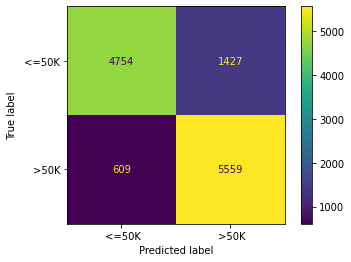

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay
# knn confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, knnTestPred)

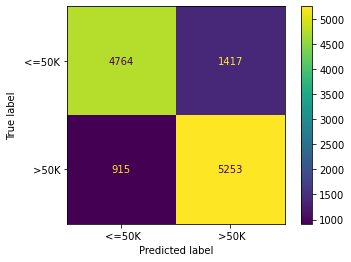

In [125]:
# logistic regression confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, lrTestPred)

Previously, the target set was found to be poorly balanced (75/25 ratio). I used SMOTE to balance the target and it was updated to a 50/50 ratio. Therefore, accuracy could be taken at face value. However, precision and recall also provide valuable insights.
The KNN and logistic regression models had similar metrics, but overall, KNN performed better than logistic regression.Therefore, my final model will be KNN.